In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import statistics

df = pd.read_csv('./movies.csv', encoding='latin1')
df.head()

,id,budget,genres,homePage,productionCompany,productionCompanyCountry,productionCountry,revenue,runtime,video,...,popularity,releaseDate,voteAvg,voteCount,genresAmount,productionCoAmount,productionCountriesAmount,actorsAmount,castWomenAmount,castMenAmount
0,5,4000000,Crime|Comedy,https://www.miramax.com/movie/four-rooms/,Miramax|A Band Apart,US|US,United States of America,4257354.0,98,False,...,20.880,1995-12-09,5.7,2077,2,2,1,25,15,9
1,6,21000000,Action|Thriller|Crime,NaN,Universal Pictures|Largo Entertainment|JVC,US|US|JP,Japan|United States of America,12136938.0,110,False,...,9.596,1993-10-15,6.5,223,3,3,2,15,3,9
2,11,11000000,Adventure|Action|Science Fiction,http://www.starwars.com/films/star-wars-episod...,Lucasfilm|20th Century Fox,US|US,United States of America,775398007.0,121,NaN,...,100.003,1977-05-25,8.2,16598,3,2,1,105,5,62
3,12,94000000,Animation|Family,http://movies.disney.com/finding-nemo,Pixar,US,United States of America,940335536.0,100,NaN,...,134.435,2003-05-30,7.8,15928,2,1,1,24,5,18
4,13,55000000,Comedy|Drama|Romance,NaN,Paramount|The Steve Tisch Company,US|,United States of America,677387716.0,142,False,...,58.751,1994-07-06,8.5,22045,3,2,1,76,18,48


716     Pirates of the Caribbean: On Stranger Tides
4710                        Avengers: Age of Ultron
5952                              Avengers: Endgame
4953                                 Justice League
5953                         Avengers: Infinity War
163        Pirates of the Caribbean: At World's End
607                                Superman Returns
7134                                  The Lion King
3791                                        Tangled
280                                    Spider-Man 3
Name: originalTitle, dtype: object


1. (3 puntos) Haga una exploración rápida de sus datos, para eso haga un resumen de su conjunto de datos.

Los datos con los que estaremos trabajando fueron extraídos de la página oficial de IMBD y describe la información sobre las películas que estuvieron en cine en los últimos años, posee una cantidad de 10,000 filas (películas) y 27 columnas (o variables). Las variables se reparten en:
- Id: Id de la película
- popularity: Índice de popularidad de la película calculado semanalmente
- budget: El presupuesto para la película.
- revenue: El ingreso de la película.
- original_title: El título original de la película, en su idioma original.
- originalLanguage: Idioma original en que se encuentra la película
- title: El título de la película traducido al inglés
- homePage: La página de inicio de la película
- video: Si tiene videos promocionales o no
- director: Director de la película
- runtime: La duración de la película.
- genres: El género de la película.
- genresAmount: Cantidad de géneros que representan la película
- productionCompany: Las compañías productoras de la película.
- productionCoAmount: Cantidad de compañías productoras que participaron en la película
- productionCompanyCountry: Países de las compañías productoras de la película
- productionCountry: Países en los que se llevó a cabo la producción de la película
- productionCountriesAmount: Cantidad de países en los que se rodó la película
- releaseDate: Fecha de lanzamiento de la película
- voteCount: El número de votos en la plataforma para la película.
- voteAvg: El promedio de los votos en la plataforma para la película
- actors: Actores que participan en la película (Elenco)
- actorsPopularity: Índice de popularidad del elenco de la película.
- actorsCharacter: Personaje que interpreta cada actor en la película
- actorsAmount: Cantidad de personas que actúan en la película
- castWomenAmount: Cantidad de actrices en el elenco de la película
- castMenAmount: Cantidad de actores en el elenco de la película.

2. (5 puntos) Diga el tipo de cada una de las variables (cualitativa ordinal o nominal, cuantitativa continua, cuantitativa discreta)

- `id`: Cuantitativa Discreta (es un número entero, no puede tener valores intermedios)
- `budget`: Cuantitativa Continua (es una cantidad de dinero, puede tener valores intermedios)
- `genres`: Cualitativa Nominal (los géneros de las películas no tienen un orden específico)
- `homePage`: Cualitativa Nominal (es una URL, no tiene un orden específico)
- `productionCompany`: Cualitativa Nominal (son nombres, no tienen un orden específico)
- `productionCompanyCountry`: Cualitativa Nominal (son nombres de países, no tienen un orden específico)
- `productionCountry`: Cualitativa Nominal (son nombres de países, no tienen un orden específico)
- `revenue`: Cuantitativa Continua (es una cantidad de dinero, puede tener valores intermedios)
- `runtime`: Cuantitativa Discreta (es un número entero que representa la duración en minutos, no puede tener valores intermedios)
- `video`: Cualitativa Nominal (es un valor booleano, no tiene un orden específico)
- `director`: Cualitativa Nominal (es un nombre, no tiene un orden específico)
- `actors`: Cualitativa Nominal (son nombres, no tienen un orden específico)
- `actorsPopularity`: Cuantitativa Continua (es una calificación que puede tener valores intermedios)
- `actorsCharacter`: Cualitativa Nominal (son nombres de personajes, no tienen un orden específico)
- `originalTitle`: Cualitativa Nominal (es un nombre de película, no tiene un orden específico)
- `title`: Cualitativa Nominal (es un nombre de película, no tiene un orden específico)
- `originalLanguage`: Cualitativa Nominal (es un código de idioma, no tiene un orden específico)
- `popularity`: Cuantitativa Continua (es una calificación que puede tener valores intermedios)
- `releaseDate`: Cuantitativa Discreta (es una fecha, no puede tener valores intermedios)
- `voteAvg`: Cuantitativa Continua (es una calificación que puede tener valores intermedios)
- `voteCount`: Cuantitativa Discreta (es un número entero, no puede tener valores intermedios)
- `genresAmount`: Cuantitativa Discreta (es un número entero, no puede tener valores intermedios)
- `productionCoAmount`: Cuantitativa Discreta (es un número entero, no puede tener valores intermedios)
- `productionCountriesAmount`: Cuantitativa Discreta (es un número entero, no puede tener valores intermedios)
- `actorsAmount`: Cuantitativa Discreta (es un número entero, no puede tener valores intermedios)
- `castWomenAmount`: Cuantitativa Discreta (es un número entero, no puede tener valores intermedios)
- `castMenAmount`: Cuantitativa Discreta (es un número entero, no puede tener valores intermedios)


3. (6 puntos) Investigue si las variables cuantitativas siguen una distribución normal y haga una tabla de frecuencias de las variables cualitativas. Explique todos los resultados.

Variables Cuantitativas

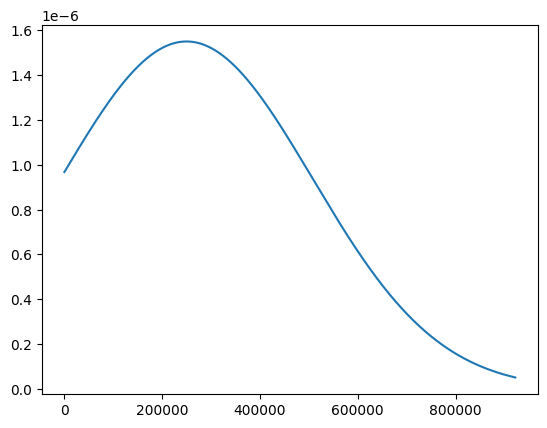

In [43]:
id = df['id']
  
# Calcular la media y la desviacion estandar
mean = statistics.mean(id)
sd = statistics.stdev(id)
  
plt.plot(id, norm.pdf(id, mean, sd))
plt.show()

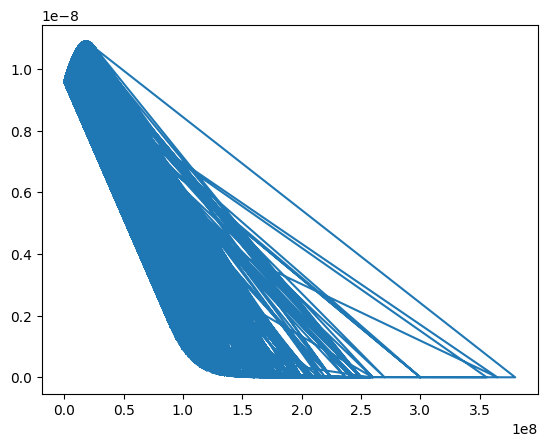

In [51]:
budget = df['budget']
  
# Calcular la media y la desviacion estandar
mean = statistics.mean(budget)
sd = statistics.stdev(budget)
  
plt.plot(budget, norm.pdf(budget, mean, sd))
plt.show()

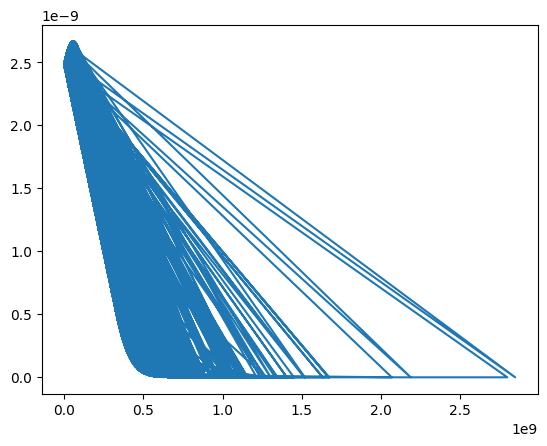

In [52]:
revenue = df['revenue']

# Calcular la media y la desviacion estandar
mean = statistics.mean(revenue)
sd = statistics.stdev(revenue)
  
plt.plot(revenue, norm.pdf(revenue, mean, sd))
plt.show()

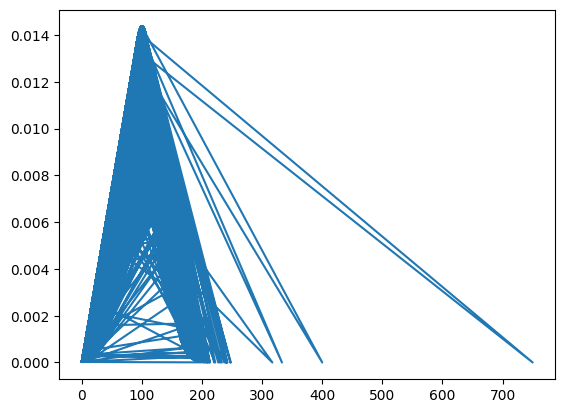

In [57]:
runtime = df['runtime']

# Calculating mean and standard deviation
mean = statistics.mean(runtime)
sd = statistics.stdev(runtime)
  
plt.plot(runtime, norm.pdf(runtime, mean, sd))
plt.show()

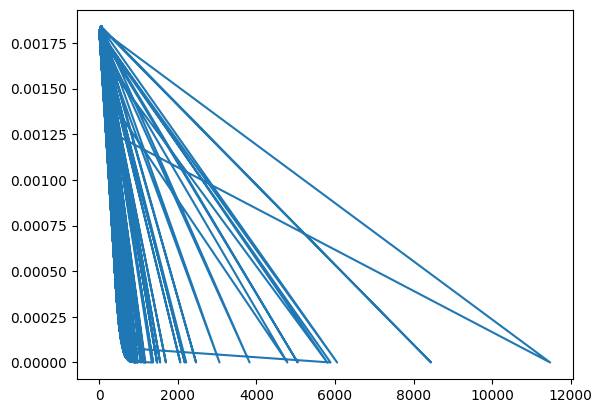

In [53]:
popularity = df['popularity']

# Calculating mean and standard deviation
mean = statistics.mean(popularity)
sd = statistics.stdev(popularity)
  
plt.plot(popularity, norm.pdf(popularity, mean, sd))
plt.show()

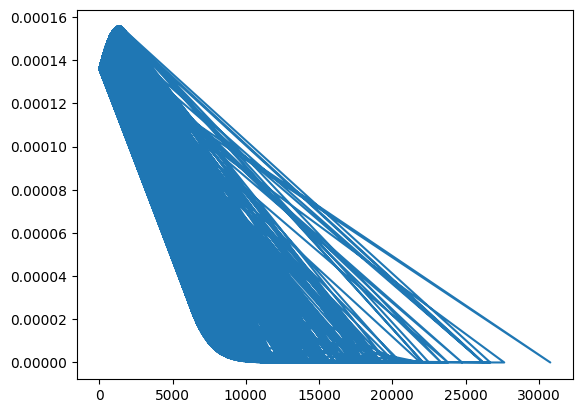

In [54]:
voteCount = df['voteCount']

# Calculating mean and standard deviation
mean = statistics.mean(voteCount)
sd = statistics.stdev(voteCount)
  
plt.plot(voteCount, norm.pdf(voteCount, mean, sd))
plt.show()

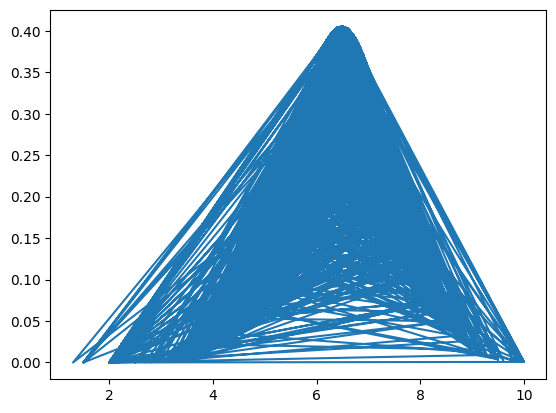

In [56]:
voteAvg = df['voteAvg']

# Calculating mean and standard deviation
mean = statistics.mean(voteAvg)
sd = statistics.stdev(voteAvg)
  
plt.plot(voteAvg, norm.pdf(voteAvg, mean, sd))
plt.show()

4.1. (3 puntos) ¿Cuáles son las 10 películas que contaron con más presupuesto?

In [46]:
peliculas_mas_costosas = df.sort_values(by="budget", ascending=False).head(10)
peliculas_mas_costosas[["originalTitle", "budget", "revenue"]]

,originalTitle,budget,revenue
716,Pirates of the Caribbean: On Stranger Tides,380000000,1.045714e+09
4710,Avengers: Age of Ultron,365000000,1.405404e+09
5952,Avengers: Endgame,356000000,2.797801e+09
4953,Justice League,300000000,6.579243e+08
5953,Avengers: Infinity War,300000000,2.046240e+09
163,Pirates of the Caribbean: At World's End,300000000,9.610000e+08
607,Superman Returns,270000000,3.910812e+08
7134,The Lion King,260000000,1.667635e+09
3791,Tangled,260000000,5.924617e+08
280,Spider-Man 3,258000000,8.908716e+08


Podemos ver una relación entre todas las peliculas, ya que casi todas las películas, exceptuando "Justice League" de Warner Brothers, pertenecen a Disney; demostrando como esta compañia siempre a invertido grande en franquicias como Marvel, Piratas del Caribe, Pixar, etc.

4.2. (3 puntos) ¿Cuáles son las 10 películas que más ingresos tuvieron?

In [45]:
peliculas_mas_ingresos = df.sort_values(by="revenue", ascending=False).head(10)
peliculas_mas_ingresos[["originalTitle", "revenue"]]

,originalTitle,revenue
3210,Avatar,2.847246e+09
5952,Avengers: Endgame,2.797801e+09
307,Titanic,2.187464e+09
4947,Star Wars: The Force Awakens,2.068224e+09
5953,Avengers: Infinity War,2.046240e+09
4914,Jurassic World,1.671713e+09
7134,The Lion King,1.667635e+09
9049,Spider-Man: No Way Home,1.631853e+09
3397,The Avengers,1.518816e+09
5087,Furious 7,1.515048e+09


Podemos observar el top 10 de las películas que más ingresos obtuvieron, el cual podemos ver muchas de marvel aunque esta compañia fue la que invertio más, logro generar bastantes ingresos con sus películas, la mejor película del top 10 es para Avatar que logro recaudar mas de 3 billones.

4.3. (3 puntos) ¿Cuál es la película que más votos tuvo?

In [44]:
pelicula_mas_votada = df.loc[df['voteCount'].idxmax()]
pelicula_mas_votada[["originalTitle", "voteCount"]]

originalTitle    Inception
voteCount            30788
Name: 3511, dtype: object

La mejor película fue Inception ya que cuenta con un total de 30,700 votos poniéndola como la mejor película más votada por los usuarios.

4.4. (3 puntos) ¿Cuál es la peor película de acuerdo a los votos de todos los usuarios?

In [43]:
peor_pelicula = df.sort_values(by="voteAvg", ascending=True).head(1)
peor_pelicula[["title", "voteAvg"]]

,title,voteAvg
9786,DAKAICHI -I'm Being Harassed by the Sexiest Ma...,1.3


La peor película fue  la de -I’m being Harassed by the Sexiest, ya que tuvo un promedio total de votos de 1.3 lo cual la posiciona en la última película y la que menos le gusto a los usuarios.

4.5. (8 puntos) ¿Cuántas películas se hicieron en cada año? ¿En qué año se hicieron más películas? Haga un gráfico de barras

1902      1
1920      1
1921      1
1922      1
1925      2
       ... 
2018    629
2019    612
2020    533
2021    816
2022      7
Name: releaseDate, Length: 99, dtype: int64
**Año con mayor cantidad de películas 2021 con 816 Películas**


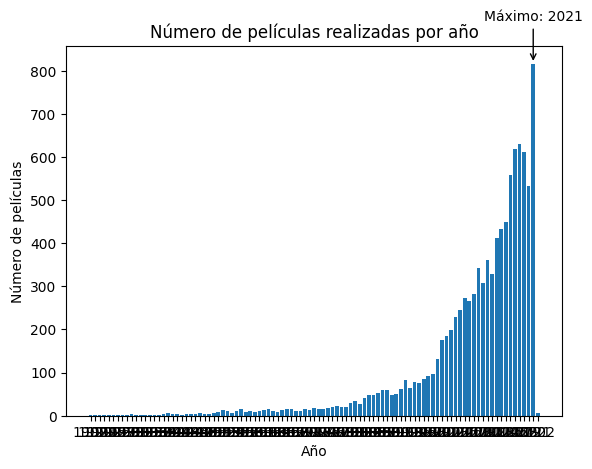

In [38]:
# Obtener el recuento de películas por año
conteo_por_anio = df['releaseDate'].str[:4].value_counts().sort_index()
print(conteo_por_anio)

# Obtener el año con mayor cantidad de películas
anio_max_pelis = conteo_por_anio.idxmax()
print("**Año con mayor cantidad de películas 2021 con 816 Películas**")
print(anio_max_pelis)

# Crear el gráfico de barras
plt.bar(conteo_por_anio.index, conteo_por_anio.values)
plt.xlabel('Año')
plt.ylabel('Número de películas')
plt.title('Número de películas realizadas por año')

# Anotar el año con mayor cantidad de películas
plt.annotate(f'Máximo: {anio_max_pelis}', xy=(anio_max_pelis, conteo_por_anio.max()), xytext=(anio_max_pelis, conteo_por_anio.max() + 100), ha='center', arrowprops=dict(facecolor='black', arrowstyle='->'))

# Mostrar el gráfico
plt.show()

Viendo todos los años y cuantas películas se realizaron al año, se puede ver claramente que el año que más películas tuvo fue el año 2021 con un total de 816 películas.

4.6. (9 puntos) ¿Cuál es el género principal de las 20 películas más recientes? ¿Cuál es el género
principal que predomina en el conjunto de datos? Represéntelo usando un gráfico

Drama                                 2
Comedy                                2
Comedy|Drama                          1
Drama|Mystery                         1
Thriller                              1
Action|Thriller|Crime|Drama           1
Documentary                           1
Action|Drama                          1
Romance                               1
Animation|Adventure|Fantasy|Family    1
Horror|Thriller|Mystery               1
Comedy|Romance|Fantasy                1
Comedy|Horror                         1
Drama|Fantasy                         1
Action|Adventure|Comedy               1
Comedy|Romance                        1
Name: genres, dtype: int64
Género principal que predomina en el conjunto de datos: Drama


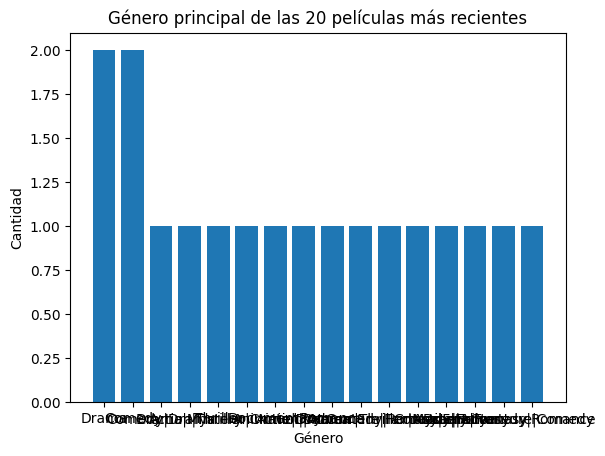

In [41]:
# Ordenar los datos por la columna "releaseDate" en orden descendente
movies_sorted = df.sort_values(by="releaseDate", ascending=False)

# Obtener los géneros principales de las 20 películas más recientes
generos_20_mas_recientes = movies_sorted.head(20)["genres"].str.split(",").explode().str.strip().value_counts()
print(generos_20_mas_recientes)

# Obtener el género principal que predomina en el conjunto de datos
genero_predominante = df["genres"].str.split(",").explode().str.strip().value_counts().idxmax()

# Imprimir el género principal que predomina en el conjunto de datos
print("Género principal que predomina en el conjunto de datos:", genero_predominante)

# Crear el gráfico de barras
plt.bar(generos_20_mas_recientes.index, generos_20_mas_recientes.values)
plt.xlabel('Género')
plt.ylabel('Cantidad')
plt.title('Género principal de las 20 películas más recientes')

# Mostrar el gráfico
plt.show()


El género principal de las 20 películas más recientes es el Drama al igual el género dominante es el Drama también, ya que como se puede ver en el resultado y el en gráfico se ve claramente que el drama aparece en muchas ocasiones dentro del top lo cual es el más dominante.

4.7. (8 puntos) ¿Las películas de qué genero principal obtuvieron mayores ganancias?

In [62]:
# Obtener los géneros principales y las ganancias de las películas
generos_ganancias = df.groupby("genres")["revenue"].sum()
print(generos_ganancias)
# Obtener el género principal con mayores ganancias
genero_mayores_ganancias = generos_ganancias.idxmax()
# Imprimir el género principal con mayores ganancias
print("\nGénero principal con mayores ganancias:", genero_mayores_ganancias)

genres
Action                                        1.560007e+09
Action|Adventure                              2.342255e+09
Action|Adventure|Animation                    0.000000e+00
Action|Adventure|Animation|Comedy|Family      7.116852e+08
Action|Adventure|Animation|Comedy|TV Movie    0.000000e+00
                                                  ...     
Western|Drama|Mystery                         1.570000e+07
Western|Horror                                0.000000e+00
Western|Mystery|Thriller|Drama                0.000000e+00
Western|TV Movie                              0.000000e+00
Western|Thriller                              8.000000e+06
Name: revenue, Length: 2345, dtype: float64

Género principal con mayores ganancias: Action|Adventure|Science Fiction


4.8. (3 puntos) ¿La cantidad de actores influye en los ingresos de las películas? ¿Se han hecho películas con más actores en los últimos años?

¿La cantidad de actores influye en los ingresos de las películas?


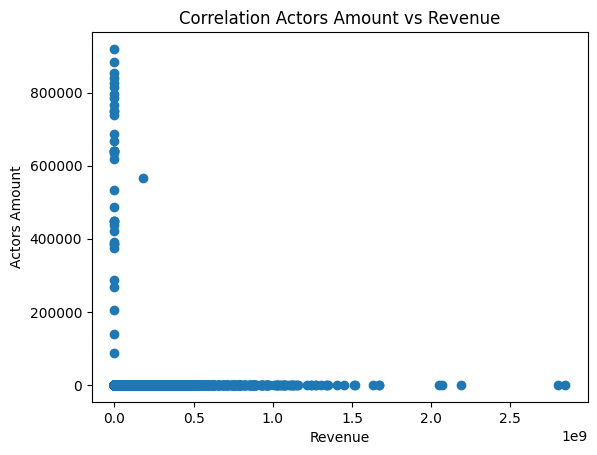

Correlación entre la cantidad de actores y los ingresos: -0.019554880174247613

Como podemos ver la cantidad de actores no influye en los ingresos de las películas, ya que no parece haber ninguna correlación entre estas dos variables.


¿Se han hecho películas con más actores en los últimos años?


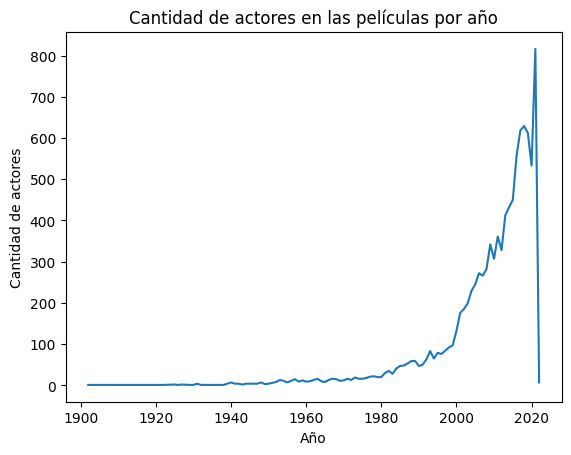

Como se puede ver en la gráfica, ha habido un crecimiento bastante grande en la cantidad de actores que se contrata por película.
Esto se puede deber por el gran crecimiento que ha tenido la industria del entretenimiento en las últimas décadas


In [61]:
print("¿La cantidad de actores influye en los ingresos de las películas?")

# Calcular la correlación entre la cantidad de actores y los ingresos de las películas
correlacion = df['actorsAmount'].corr(df['revenue'])

# Calculate the line of best fit
slope, intercept = np.polyfit(df["actorsAmount"], df["revenue"], 1)

# Generate x values
x_values = np.linspace(df["actorsAmount"].min(), df["actorsAmount"].max(), 100)

# Calculate corresponding y values
y_values = slope * x_values + intercept

# Plot the scatter plot
plt.scatter(df["revenue"], df["actorsAmount"])
plt.title('Correlation Actors Amount vs Revenue')
plt.ylabel('Actors Amount')
plt.xlabel('Revenue')
plt.show()

# Imprimir la correlación entre la cantidad de actores y los ingresos
print("Correlación entre la cantidad de actores y los ingresos:", correlacion)
# Explicacion de la correlacion
print("\nComo podemos ver la cantidad de actores no influye en los ingresos de las películas, ya que no parece haber ninguna correlación entre estas dos variables.\n")


print("\n¿Se han hecho películas con más actores en los últimos años?")

# Mostrar la gráfica
plt.show("¿Se han hecho películas con más actores en los últimos años?")

# Obtener la cantidad de actores por año
actores_por_anio = df["releaseDate"].str[:4].astype(int).value_counts().sort_index()

# Crear el gráfico de línea
plt.plot(actores_por_anio.index, actores_por_anio.values)
plt.xlabel('Año')
plt.ylabel('Cantidad de actores')
plt.title('Cantidad de actores en las películas por año')

# Mostrar el gráfico
plt.show()

print("Como se puede ver en la gráfica, ha habido un crecimiento bastante grande en la cantidad de actores que se contrata por película.")
print("Esto se puede deber por el gran crecimiento que ha tenido la industria del entretenimiento en las últimas décadas")

4.9. (3 puntos) ¿Es posible que la cantidad de hombres y mujeres en el reparto influya en la popularidad y los ingresos de las películas?

     castMenAmount castWomenAmount       revenue
3210            21               9  2.847246e+09
5952            62              28  2.797801e+09
307             59              27  2.187464e+09
4947            74              24  2.068224e+09
5953            43              21  2.046240e+09
...            ...             ...           ...
124             31               7  7.866360e+08
6728            46              13  7.863656e+08
279             48              22  7.837663e+08
5889            22              12  7.831000e+08
2               62               5  7.753980e+08

[100 rows x 3 columns]


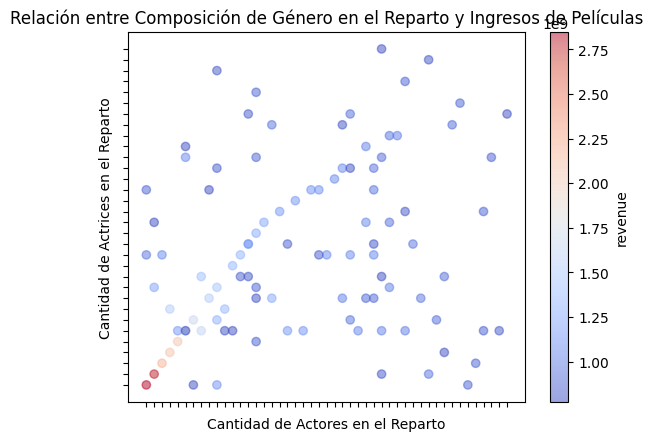

     castMenAmount castWomenAmount  popularity
8225            25              11   11474.647
9049            33              13    8443.740
7352            13               8    6055.643
7614            10               9    5887.379
8556             9               9    5804.441
...            ...             ...         ...
9785             0               0     480.533
6882            35              11     476.133
9663             1               0     475.230
6687            20               9     474.827
8231            13               2     474.403

[100 rows x 3 columns]


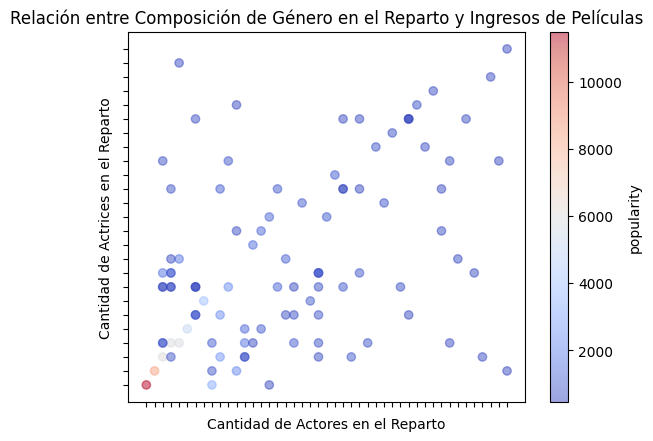

In [94]:
import matplotlib.colors as mcolors

# Define your own min and max
vmin = df["revenue"].min() / 2
vmax = df["revenue"].max() / 2

# Create a custom normalizer
norm = mcolors.Normalize(vmin=vmin, vmax=vmax)
# Obtener top 100 peliculas
cantidadActores = df.nlargest(100,"revenue")
# Crear el scatter plot
plt.scatter(cantidadActores["castMenAmount"], cantidadActores["castWomenAmount"], alpha=0.5, c=cantidadActores["revenue"], cmap="coolwarm")

# Agregar etiquetas y título
plt.xlabel("Cantidad de Actores en el Reparto")
plt.ylabel("Cantidad de Actrices en el Reparto")
plt.title("Relación entre Composición de Género en el Reparto y Ingresos de Películas")

plt.gca().axes.xaxis.set_ticklabels([])
plt.gca().axes.yaxis.set_ticklabels([])

# Agregar barra de color
cbar = plt.colorbar()
cbar.set_label("revenue")

# Mostrar la gráfica
plt.show()


# Define your own min and max
vmin = df["popularity"].min() / 2
vmax = df["popularity"].max() / 2

# Create a custom normalizer
norm = mcolors.Normalize(vmin=vmin, vmax=vmax)
# Obtener top 100 peliculas
cantidadActores = df.nlargest(100,"popularity")
# Crear el scatter plot
plt.scatter(cantidadActores["castMenAmount"], cantidadActores["castWomenAmount"], alpha=0.5, c=cantidadActores["popularity"], cmap="coolwarm")

# Agregar etiquetas y título
plt.xlabel("Cantidad de Actores en el Reparto")
plt.ylabel("Cantidad de Actrices en el Reparto")
plt.title("Relación entre Composición de Género en el Reparto y Ingresos de Películas")

plt.gca().axes.xaxis.set_ticklabels([])
plt.gca().axes.yaxis.set_ticklabels([])

# Agregar barra de color
cbar = plt.colorbar()
cbar.set_label("popularity")

# Mostrar la gráfica
plt.show()

4.10. (8 puntos) ¿Quiénes son los directores que hicieron las 20 películas mejor calificadas?

In [112]:
# Ordenar el DataFrame por la columna "voteAvg" de forma descendente y seleccionar los primeros 20 registros
top_20_movies = df.nlargest(20, "voteAvg")
print(top_20_movies[["title", "voteAvg"]])
# Obtener los directores de las películas seleccionadas
directors = top_20_movies["director"].unique()

# Imprimir los directores
print("")
print("**DIRECTORES DE LAS 20 PELICULAS MEJOR CALIFICADAS**")
print(directors)

                                                  title  voteAvg
8632                           Hot Naked Sex & the City     10.0
9084                                           Holidays     10.0
9246     Steven Universe: The Movie: Behind the Curtain     10.0
9298   Spirit of Vengeance: The Making of 'Ghost Rider'     10.0
9347  How Ponyo was Born ~Hayao Miyazaki's Thought P...     10.0
9733                             Christmas at the Ranch     10.0
9875           El Chavo Del Ocho: Lo Mejor De Don Ramon     10.0
9990                           Los Vengadores Chiflados     10.0
6750                  Dragon Ball Kami BEST [Bonus DVD]      9.8
6885    The Spectacular Spider-Man Attack of the Lizard      9.6
6170                                      Ebola Zombies      9.5
7317                 Bob Esponja: Días de Cangreburgers      9.5
7453              Doctor Strange: The Fabric of Reality      9.5
9368                                Aunt's Temptation 3      9.5
5528                     

4.11. (8 puntos) ¿Cómo se correlacionan los presupuestos con los ingresos? ¿Los altos presupuestos significan altos ingresos? Haga los gráficos que necesite, histograma, diagrama de dispersión

Correlación entre el presupuesto y los ingresos: 0.757454042495599


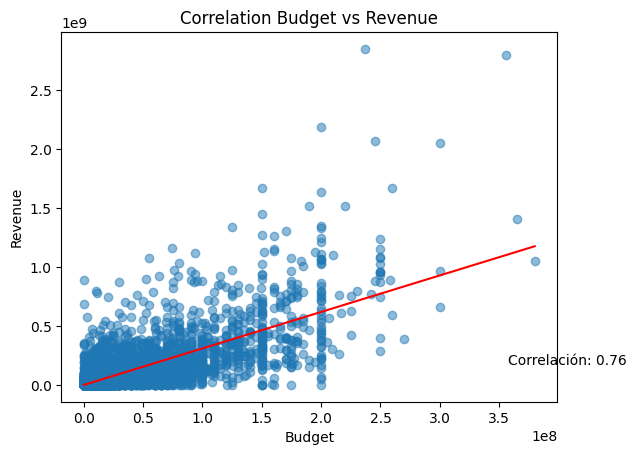

In [123]:
correlacion = df['budget'].corr(df['revenue'])
print("Correlación entre el presupuesto y los ingresos:", correlacion)

# Calcular la correlación entre la cantidad de actores y los ingresos de las películas
correlacion = df['budget'].corr(df['revenue'])

# Calculate the line of best fit
slope, intercept = np.polyfit(df["budget"], df["revenue"], 1)

# Generate x values
x_values = np.linspace(df["budget"].min(), df["budget"].max(), 100)

# Calculate corresponding y values
y_values = slope * x_values + intercept

# Plot the scatter plot
plt.scatter(df["budget"], df["revenue"], alpha=0.5)
plt.plot(x_values, y_values, color='red')  # Plot the line of best fit
plt.text(0.9, 0.1, f"Correlación: {correlacion:.2f}", transform=plt.gca().transAxes)

plt.title('Correlation Budget vs Revenue')
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.show()

4.12. (7 puntos) ¿Se asocian ciertos meses de lanzamiento con mejores ingresos?

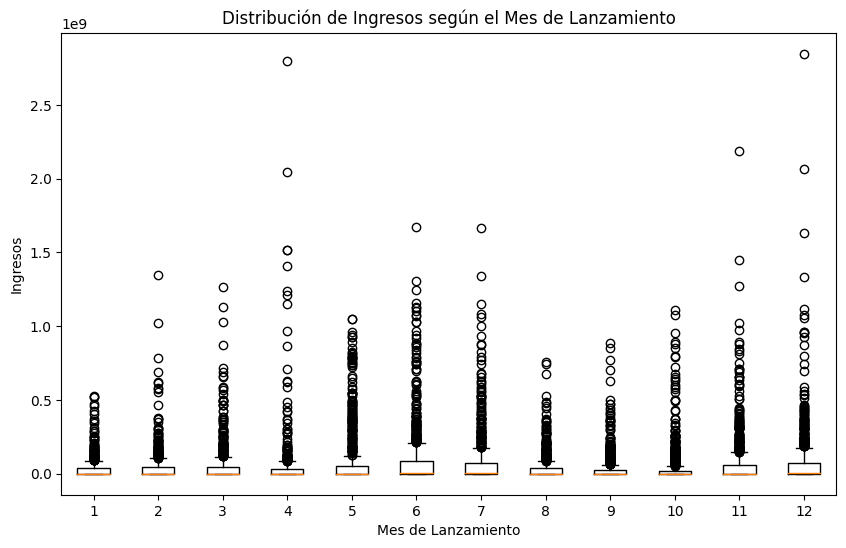

In [125]:
# Extraer el mes de lanzamiento de la columna "releaseDate"
df["releaseMonth"] = pd.to_datetime(df["releaseDate"]).dt.month

# Crear el boxplot
plt.figure(figsize=(10, 6))
plt.boxplot([df[df["releaseMonth"] == month]["revenue"] for month in range(1, 13)], labels=[str(month) for month in range(1, 13)])
plt.xlabel("Mes de Lanzamiento")
plt.ylabel("Ingresos")
plt.title("Distribución de Ingresos según el Mes de Lanzamiento")
plt.show()

4.13. (8 puntos) ¿En qué meses se han visto los lanzamientos con mejores ingresos? ¿Cuantas películas, en promedio, se han lanzado por mes?

¿En qué meses se han visto los lanzamientos con mejores ingresos?
releaseMonth
6     9.474711e+07
5     8.784544e+07
7     7.602870e+07
12    7.435888e+07
Name: revenue, dtype: float64


Text(0.5, 0, 'Mes')

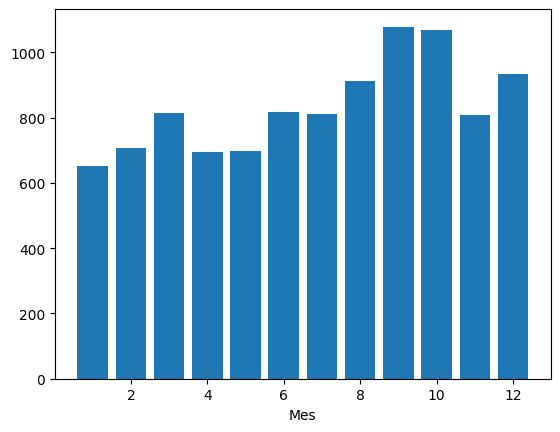

In [126]:
print("¿En qué meses se han visto los lanzamientos con mejores ingresos?")
df["releaseMonth"] = pd.to_datetime(df["releaseDate"]).dt.month
df["revenue"] = pd.to_numeric(df["revenue"])

best_months = df.groupby("releaseMonth")["revenue"].mean().sort_values(ascending=False).head(4)
print(best_months)

# Crear el gráfico de barras
bymonth = df.groupby("releaseMonth")["id"].count()
plt.bar(bymonth.index, bymonth.values)
plt.xlabel('Mes')

In [127]:
# Extraer el mes de lanzamiento y los ingresos de las películas
df["releaseMonth"] = pd.to_datetime(df["releaseDate"]).dt.month
df["revenue"] = pd.to_numeric(df["revenue"])

# Calcular los ingresos promedio por mes
average_revenue_by_month = df.groupby("releaseMonth")["revenue"].mean()

# Encontrar el mes con los mayores ingresos
best_months = average_revenue_by_month[average_revenue_by_month == average_revenue_by_month.max()].index

# Calcular el promedio de películas lanzadas por mes
average_movies_per_month = df["releaseMonth"].value_counts().mean()

# Imprimir los meses con los mejores ingresos
print("Meses con mejores ingresos:")
for month in best_months:
    print(month)

# Imprimir el promedio de películas lanzadas por mes
print(f"Promedio de películas lanzadas por mes: {average_movies_per_month:.2f}")

Meses con mejores ingresos:
6
Promedio de películas lanzadas por mes: 833.33


4.14. (7 puntos) ¿Cómo se correlacionan las calificaciones con el éxito comercial?

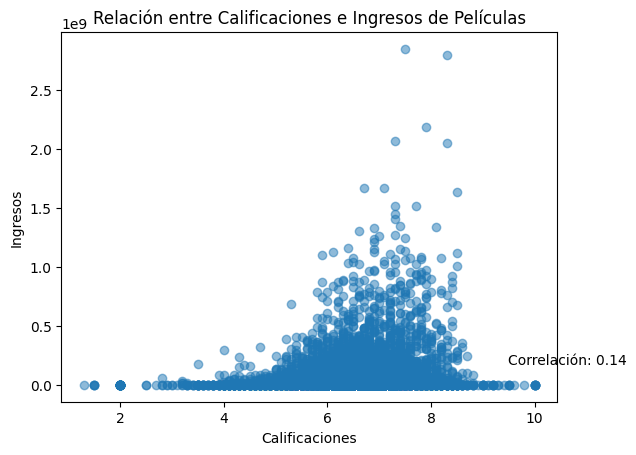

In [128]:
# Crear el diagrama de dispersión
plt.scatter(df["voteAvg"], df["revenue"], alpha=0.5)

# Agregar etiquetas y título
plt.xlabel("Calificaciones")
plt.ylabel("Ingresos")
plt.title("Relación entre Calificaciones e Ingresos de Películas")

# Calcular el coeficiente de correlación
correlation = np.corrcoef(df["voteAvg"], df["revenue"])[0, 1]
plt.text(0.9, 0.1, f"Correlación: {correlation:.2f}", transform=plt.gca().transAxes)

# Mostrar la gráfica
plt.show()

4.15. (5 puntos) ¿A qué género principal pertenecen las películas más largas?

In [4]:
# Obtener las películas más largas
longest_movies = df.nlargest(10, "runtime")
print(longest_movies[["title", "runtime", "genres"]])

# Obtener el género principal de las películas más largas
genre_counts = {}
for index, row in longest_movies[["genres", "id"]].iterrows():
    genre_list = row['genres'].split("|")
    main_genre = genre_list[0]
    if main_genre in genre_counts:
        genre_counts[main_genre][0] += 1
        genre_counts[main_genre][1] += longest_movies.loc[longest_movies['id'] == row['id'], 'runtime'].values[0]
    else:
        genre_counts[main_genre] = [1, longest_movies.loc[longest_movies['id'] == row['id'], 'runtime'].values[0]]

# Encontrar el género principal con más películas largas
main_genre = max(genre_counts, key=lambda key: genre_counts[key][1])

# Imprimir el resultado
print("\n\nEl género principal de las películas más largas es:", main_genre)

                                                  title  runtime  \
9347  How Ponyo was Born ~Hayao Miyazaki's Thought P...      750   
5358  Crystal Lake Memories: The Complete History of...      400   
3885                                           Napoleon      333   
962                                                1900      317   
1263                                          Cleopatra      248   
7065                 Kill Bill: The Whole Bloody Affair      247   
1948                                             Hamlet      242   
9686                       Zack Snyder's Justice League      242   
3740           Never Sleep Again: The Elm Street Legacy      240   
5592                               WWE WrestleMania XXX      240   

                                        genres  
9347                               Documentary  
5358                               Documentary  
3885                         Drama|History|War  
962                              Drama|History  
1263  